# Рубежный контроль №1
Вариант **№4**

Студент: **Кучеренко М.А.**  
Группа: **ИУ5-21М**

### Задача №4.
Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "label encoding".

### Задача №24.
Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе 5% и 95% квантилей.

### Дополнительные требования
Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

## Подготовка датасета

Рассмотрим исторические данные по выходу и продажам видеоигр из [на 2019 год](https://www.kaggle.com/ashaheedq/video-games-sales-2019)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('vgsales-12-4-2019-short.csv')
print(f'Total loaded {len(df.index)} video games')

Total loaded 55792 video games


In [3]:
df['Sales'] = df[['Total_Shipped', 'Global_Sales']].max(axis=1)
df['Sales'].fillna(0, inplace=True)
df = df.drop(columns = ['Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales'])

In [4]:
clear_columns = ('Genre', 'Year', 'Platform', 'Critic_Score')

In [5]:
df.dropna(subset=clear_columns, inplace=True)
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Sales
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0,82.86
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,1985.0,40.24
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,37.14
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,33.09
5,6,Pokemon Red / Green / Blue Version,Role-Playing,E,GB,Nintendo,Game Freak,9.4,NaN,1998.0,31.38


## Задача №4

In [6]:
from sklearn.preprocessing import LabelEncoder 

In [7]:
col = 'Genre'

In [8]:
le = LabelEncoder()
col_le = le.fit_transform(df[col])
print(np.unique(df[col]), np.unique(col_le))
df[col] = col_le

['Action' 'Action-Adventure' 'Adventure' 'Board Game' 'Education'
 'Fighting' 'MMO' 'Misc' 'Music' 'Party' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Sandbox' 'Shooter' 'Simulation' 'Sports' 'Strategy'
 'Visual Novel'] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [9]:
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Sales
0,1,Wii Sports,17,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0,82.86
1,2,Super Mario Bros.,10,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,1985.0,40.24
2,3,Mario Kart Wii,12,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,37.14
4,5,Wii Sports Resort,17,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,33.09
5,6,Pokemon Red / Green / Blue Version,13,E,GB,Nintendo,Game Freak,9.4,NaN,1998.0,31.38


In [10]:
df[col].unique()

array([17, 10, 12, 13,  7,  9, 16,  0, 15,  1,  5, 18,  2,  6,  8, 11, 14,
        3,  4, 19])

## Задача №24

In [11]:
col = 'Critic_Score'

In [12]:
# Вычисление верхней и нижней границы
def get_outlier_boundaries(df, col):
    lower_boundary = df[col].quantile(0.05)
    upper_boundary = df[col].quantile(0.95)
    return lower_boundary, upper_boundary    

In [13]:
lower_boundary, upper_boundary = get_outlier_boundaries(df, col)
outliers_temp = np.where(df[col] > upper_boundary, True, np.where(df[col] < lower_boundary, True, False))
df_trimmed = df.loc[~(outliers_temp), ]  
print(f'Lines before: {len(df)}, lines after: {len(df_trimmed)}')

Lines before: 6532, lines after: 5920


In [14]:
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Sales
0,1,Wii Sports,17,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0,82.86
1,2,Super Mario Bros.,10,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,1985.0,40.24
2,3,Mario Kart Wii,12,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,37.14
4,5,Wii Sports Resort,17,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,33.09
5,6,Pokemon Red / Green / Blue Version,13,E,GB,Nintendo,Game Freak,9.4,NaN,1998.0,31.38


In [15]:
df_trimmed.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Sales
0,1,Wii Sports,17,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0,82.86
2,3,Mario Kart Wii,12,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,37.14
4,5,Wii Sports Resort,17,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,33.09
6,7,New Super Mario Bros.,10,E,DS,Nintendo,Nintendo EAD,9.1,8.1,2006.0,30.80
8,9,New Super Mario Bros. Wii,10,E,Wii,Nintendo,Nintendo EAD,8.6,9.2,2009.0,30.22


## Дополнительные требования

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [17]:
col_x = 'Year'
col_y = 'Platform'

In [18]:
agg_data = df.groupby("Platform").Rank.count().sort_values(ascending=False).reset_index()
agg_data.columns = ["Platform_x", "Platform_Freq"]
df_merged = pd.merge(df, agg_data, left_on="Platform", right_on="Platform_x").drop(columns="Platform_x")

In [19]:
df_merged.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Sales,Platform_Freq
0,1,Wii Sports,17,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0,82.86,347
1,3,Mario Kart Wii,12,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,37.14,347
2,5,Wii Sports Resort,17,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,33.09,347
3,9,New Super Mario Bros. Wii,10,E,Wii,Nintendo,Nintendo EAD,8.6,9.2,2009.0,30.22,347
4,12,Wii Play,7,E,Wii,Nintendo,Nintendo EAD,5.9,4.5,2007.0,28.02,347


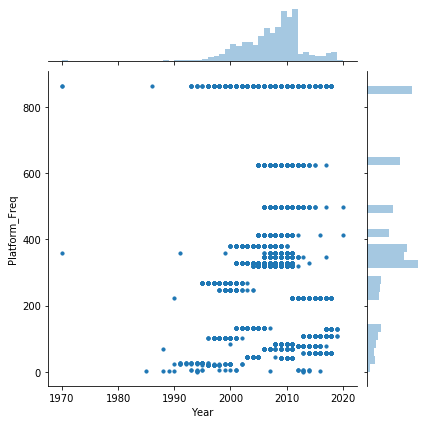

In [20]:
sns.jointplot(x=df_merged["Year"], y=df_merged["Platform_Freq"], kind='scatter', s=10)
plt.show()